1. 读取data中2023_6文件夹中的open_rank_20236.csv数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd

# 读取数据集
df = pd.read_csv('open_rank_20236.csv')


# 计算value的最大值、最小值、均值和中位数
max_value = df['value'].max()
min_value = df['value'].min()
mean_value = df['value'].mean()
median_value = df['value'].median()

# 打印结果
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020.csv文件，分析美国排名前十的项目的平均增长率。

In [7]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('activity_2022.csv')

# 计算每个项目的年增长率
growth_rates = {}

for repo in df['repo']:
    values = df[df['repo'] == repo].iloc[0, 1:].values  # 获取该项目的所有年份数据
    repo_growth_rates = []
    
    for i in range(1, len(values)):
        # 计算增长率
        growth_rate = (values[i] - values[i-1]) / values[i-1] * 100
        repo_growth_rates.append(growth_rate)
    
    # 计算该项目的平均增长率
    avg_growth_rate = sum(repo_growth_rates) / len(repo_growth_rates)
    growth_rates[repo] = avg_growth_rate

# 将结果输出
growth_rates_df = pd.DataFrame(list(growth_rates.items()), columns=['Repo', 'Avg Growth Rate'])
print(growth_rates_df)


                                     Repo  Avg Growth Rate
0                MicrosoftDocs/azure-docs        -1.792781
1                           NixOS/nixpkgs         0.029453
2                          dotnet/runtime        -2.284829
3                          elastic/kibana        -0.365071
4  firstcontributions/first-contributions        14.082374
5                         flutter/flutter        -1.240426
6                     home-assistant/core         0.845268
7                        microsoft/vscode         2.290469
8                         pytorch/pytorch         1.316038
9                          rust-lang/rust        -0.377805


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

        name  issue_comment  open_issue  open_pull  review_comment  \
0    Alibaba         111972       22397      35266           48412   
1      Baidu          79370       15580      27414           35072   
2  Ant group          83116       15944      17940           20815   
3    PingCAP         167814        8155      23052           60402   
4    Tencent          39949       10162      20777            7650   

   merged_pull  rank      value  rankDelta  valueDelta  
0        26732     1  103368.49          0    21093.11  
1        21680     2   71636.82          0    10032.08  
2        14464     3   61897.32          0     6380.83  
3        18380     4   48527.89          0     2329.36  
4        17725     5   39080.82          0    12565.41  
        name  issue_comment  open_issue  open_pull  review_comment  \
0  Microsoft        1437317      189185     309685          456166   
1     Google         642832       69221     130672          173238   
2     Amazon         324363

<Figure size 1400x800 with 0 Axes>

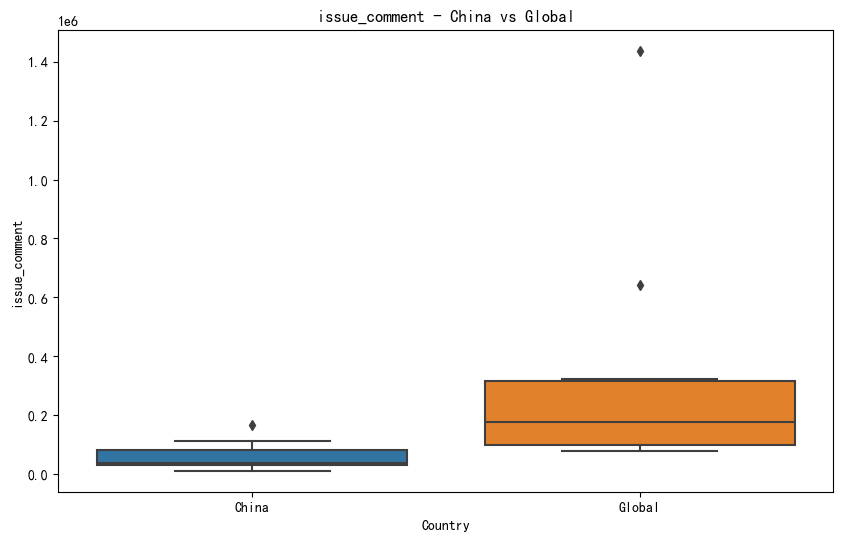

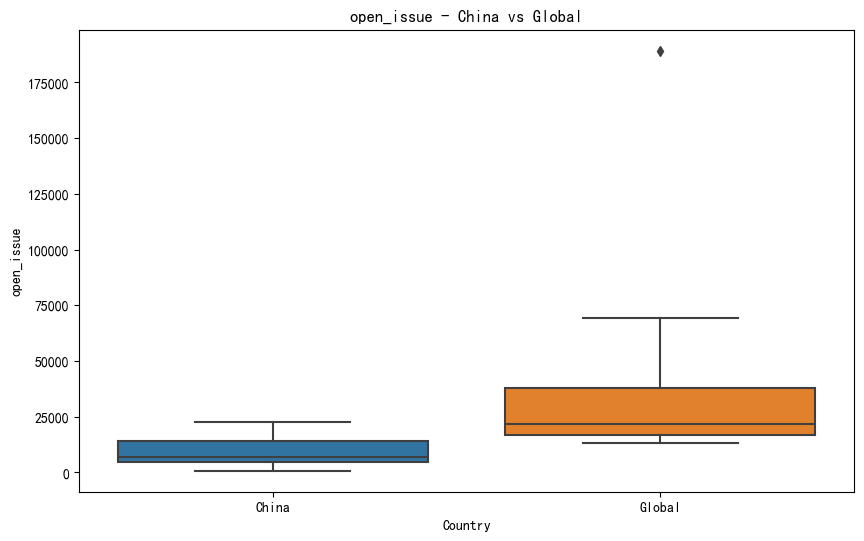

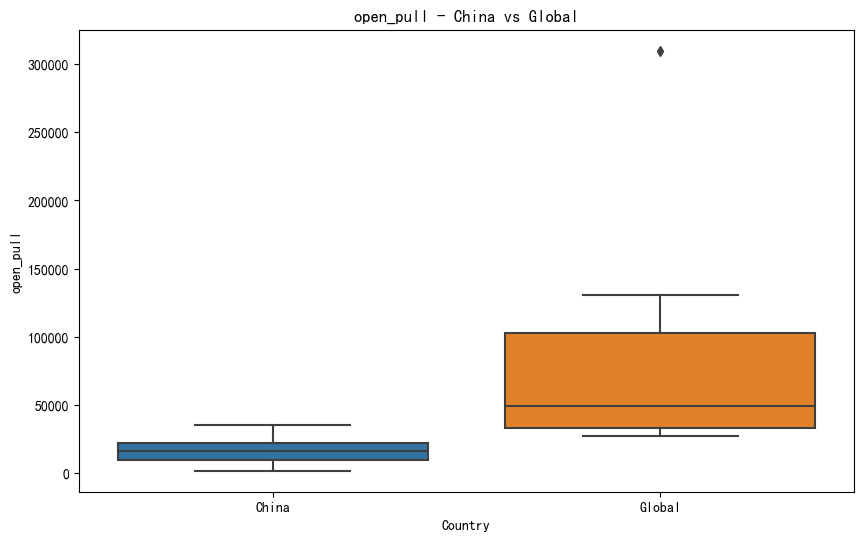

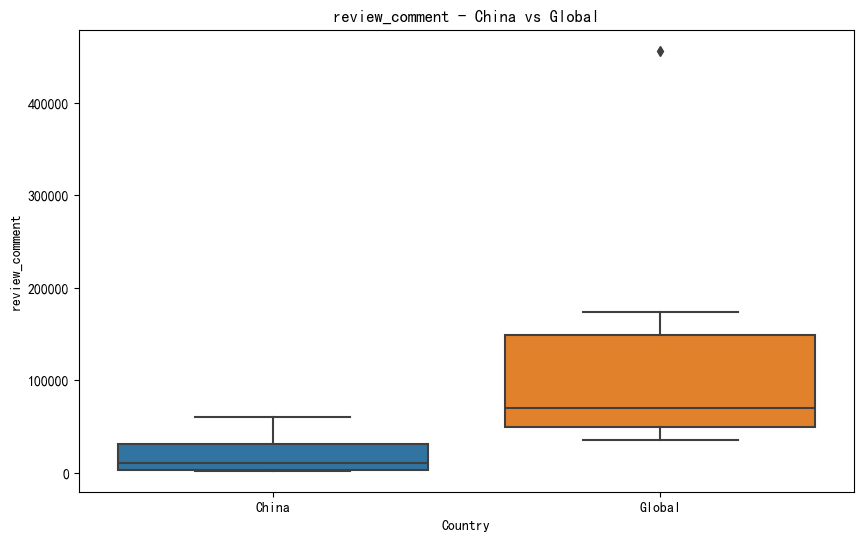

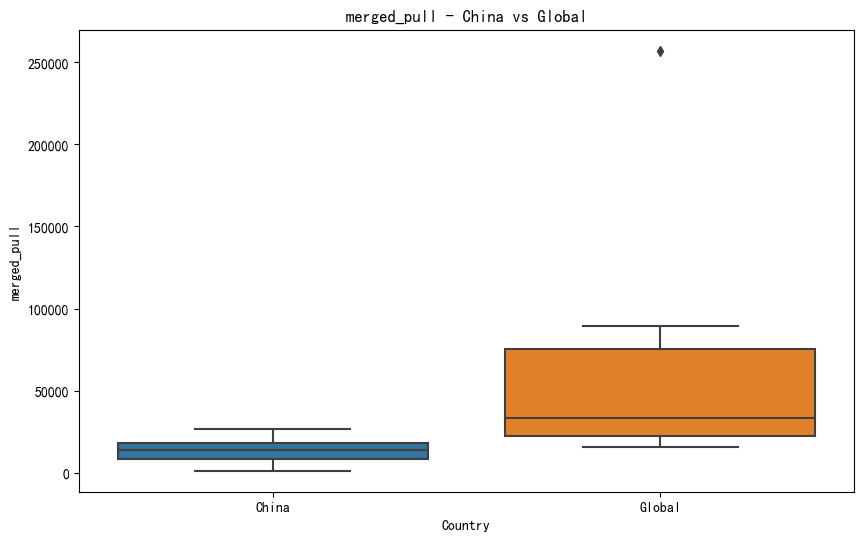

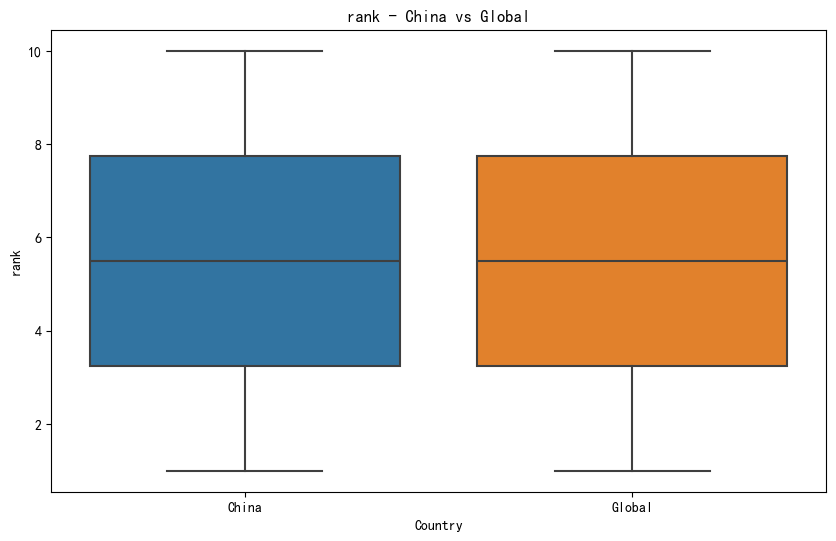

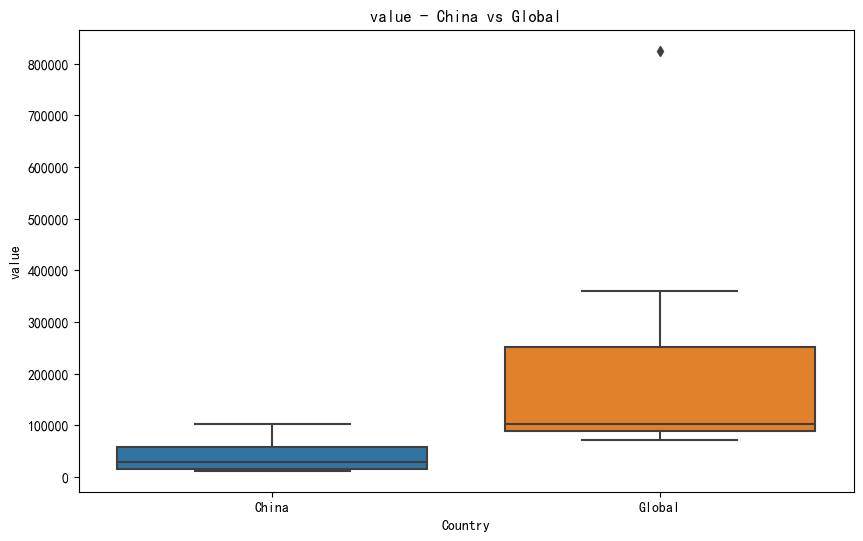

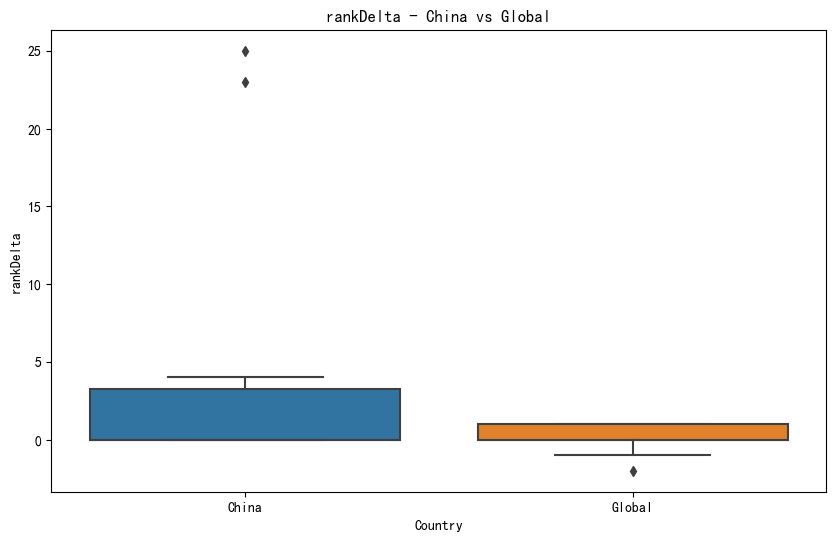

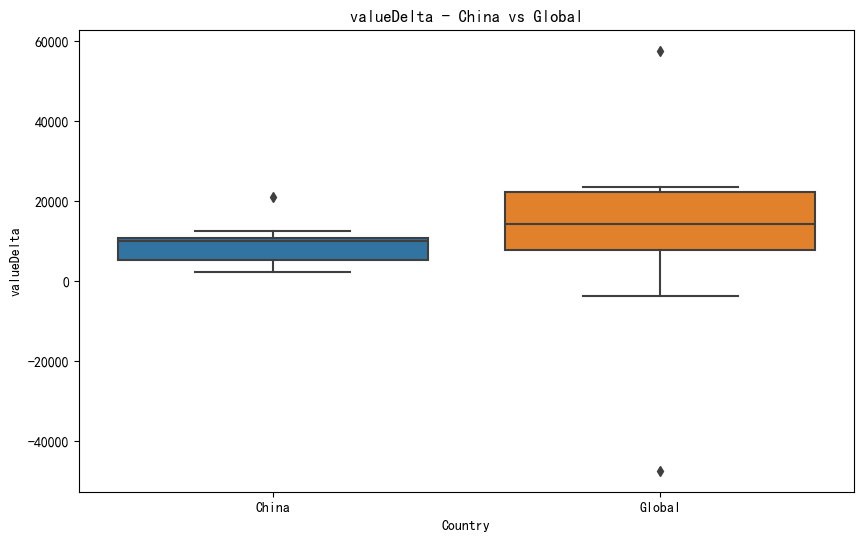

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置显示中文
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
# 读取CSV文件
china_df = pd.read_csv('china_2022.csv')
global_df = pd.read_csv('global_2022.csv')

# 查看数据结构
print(china_df.head())
print(global_df.head())

# 选择需要比较的变量（不包括name列）
columns_to_compare = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']

# 计算每列的描述性统计
china_stats = china_df[columns_to_compare].describe()
global_stats = global_df[columns_to_compare].describe()

# 输出统计结果
print("中国开源企业统计:")
print(china_stats)
print("\n全球开源企业统计:")
print(global_stats)

# 计算两者差异（均值差异、标准差差异等）
mean_diff = china_stats.loc['mean'] - global_stats.loc['mean']
std_diff = china_stats.loc['std'] - global_stats.loc['std']

print("\n均值差异：")
print(mean_diff)
print("\n标准差差异：")
print(std_diff)

# 可视化比较：箱型图展示中国与全球企业在各项指标上的差异
plt.figure(figsize=(14, 8))

# 创建一个包含中国和全球数据的列
china_df['Country'] = 'China'
global_df['Country'] = 'Global'

# 合并数据用于绘图
combined_df = pd.concat([china_df[columns_to_compare + ['Country']], global_df[columns_to_compare + ['Country']]])

# 绘制箱型图
for column in columns_to_compare:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=column, data=combined_df)
    plt.title(f'{column} - China vs Global')
    plt.show()


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [11]:
# 定义概率值
P_A = 0.25  # 非软件型项目的概率
P_B_given_A = 0.85  # 非软件型项目带有HTML/Markdown标签的概率
P_A_prime = 0.75  # 软件型项目的概率
P_B_given_A_prime = 0.10  # 软件型项目带有HTML/Markdown标签的概率

# 计算项目带有HTML/Markdown标签的总概率 P(B)
P_B = (P_B_given_A * P_A) + (P_B_given_A_prime * P_A_prime)

# 计算已知项目带有HTML/Markdown标签时，该项目是非软件型项目的概率 P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B

# 打印结果
print(f"已知一个项目带有HTML/Markdown标签，该项目是非软件型项目的概率是：{P_A_given_B:.2%}")

已知一个项目带有HTML/Markdown标签，该项目是非软件型项目的概率是：73.91%


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [13]:
# 定义概率值
P_A = 0.50  # 工具组件型项目的概率
P_B_given_A = 0.35  # 工具组件型项目由JavaScript语言编写的概率
P_A_prime = 0.50  # 非工具组件型项目的概率
P_B_given_A_prime = 0.10  # 非工具组件型项目由JavaScript语言编写的概率
# 计算项目由JavaScript语言编写的总概率 P(B)
P_B = (P_B_given_A * P_A) + (P_B_given_A_prime * P_A_prime)

# 计算已知项目由JavaScript语言编写时，它是工具组件型项目的概率 P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B

# 打印结果
print(f"已知一个项目是由JavaScript语言编写的，它是工具组件型项目的概率是：{P_A_given_B:.2%}")

已知一个项目是由JavaScript语言编写的，它是工具组件型项目的概率是：77.78%


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

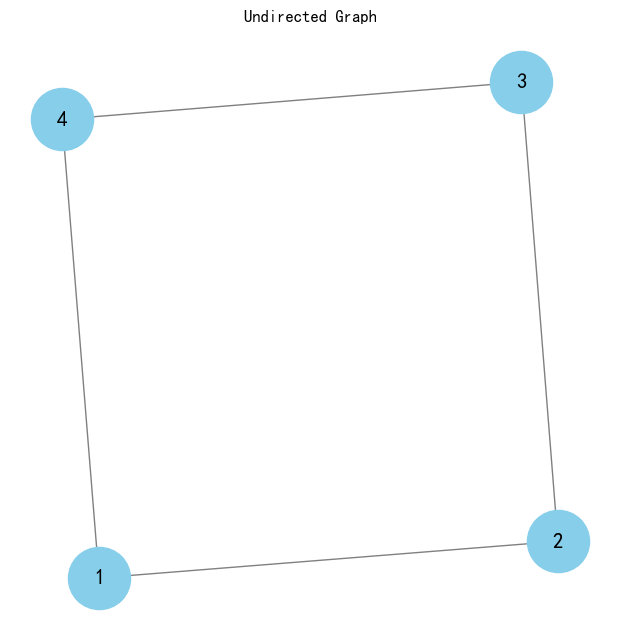

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户和边
user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点（这里直接根据user列表添加）
G.add_nodes_from(user)

# 添加边（根据edges列表添加）
G.add_edges_from(edges)

# 绘制图
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')

# 展示图形
plt.title("Undirected Graph")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

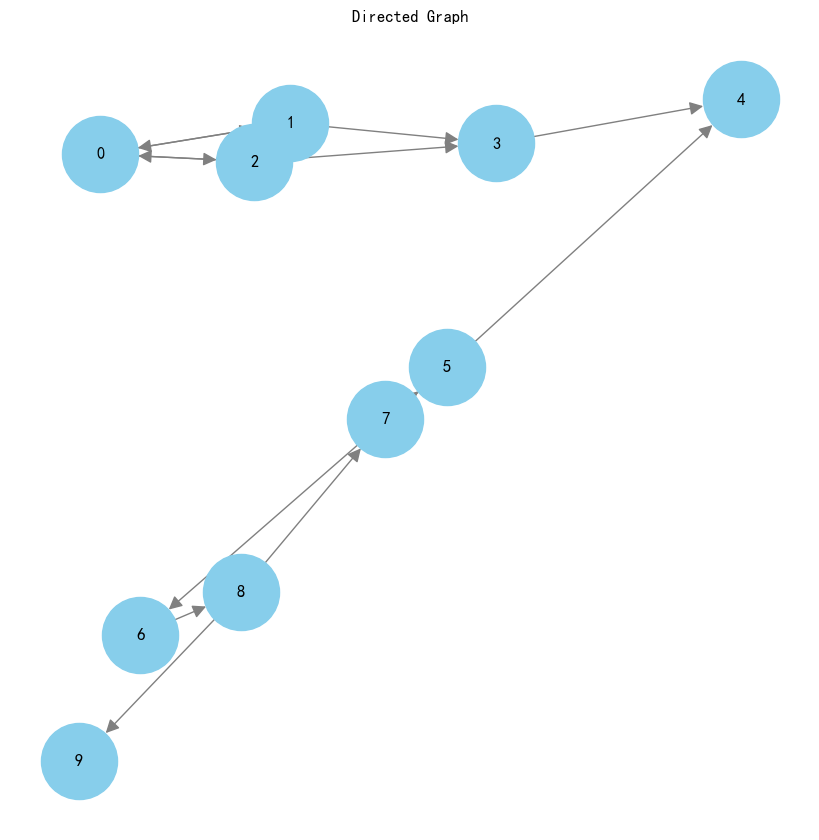

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), 
         (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制图
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局来定位节点

# 绘制有向图
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray', arrowsize=20)

# 展示图形
plt.title("Directed Graph")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

节点的 PageRank 值:
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


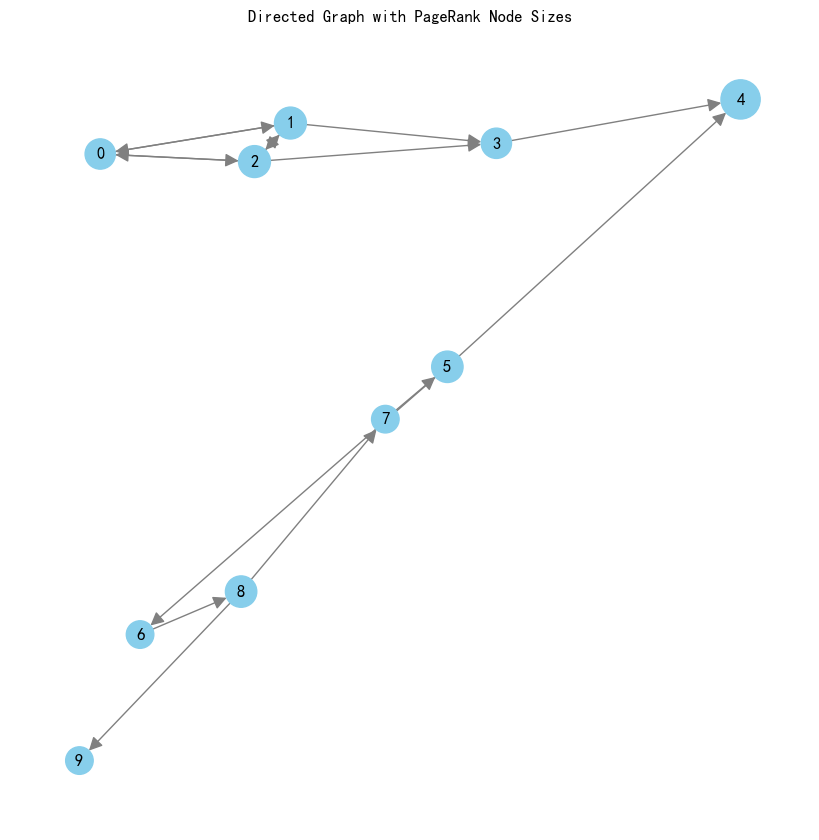

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), 
         (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算 PageRank 值
pagerank = nx.pagerank(G, alpha=0.85)

# 输出每个节点的 PageRank 值
print("节点的 PageRank 值:")
for node, pr in pagerank.items():
    print(f"节点 {node}: {pr:.4f}")

# 绘制图，节点大小根据 PageRank 值调整
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # 使用 spring 布局来定位节点

# 绘制有向图，节点大小根据 PageRank 设置
node_size = [v * 5000 for v in pagerank.values()]  # 放大 PageRank 值来设置节点大小

# 绘制有向图
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=12, font_weight='bold', edge_color='gray', arrowsize=20, node_color='skyblue')

# 展示图形
plt.title("Directed Graph with PageRank Node Sizes")
plt.show()
